In [47]:
import data, data.gene_datasets, data.graph
import networkx as nx
import matplotlib, matplotlib.pyplot as plt
import numpy as np

In [48]:
def sample_neighbors(g, gene, num_neighbors, include_self=True):
    results = set([])
    if include_self:
        results = set([gene])
    all_nodes = set(g.nodes)
    first_degree = set(g.neighbors(gene))
    second_degree = set()
    for x in g.neighbors(gene):
        second_degree = second_degree.union(set(g.neighbors(x)))
    while len(results) < num_neighbors:
        if len(first_degree) - len(results) > 0:
            unique = sorted(first_degree - results)
            results.add(unique.pop())
        elif len(second_degree) - len(results) > 0:
            unique = sorted(second_degree - results)
            results.add(unique.pop())
        else:
            unique = sorted(all_nodes - results)
            results.add(unique.pop())
    return results

In [3]:
tcgatissue = data.gene_datasets.TCGATissue()

Converting one-hot labels to integers


In [6]:
graph = Graph()
path = "/data/lisa/data/genomics/graph/pancan-tissue-graph.hdf5"
graph.load_graph(path)

g = nx.from_numpy_matrix(graph.adj)
mapping = dict(zip(range(0, len(tcgatissue.df.columns)), tcgatissue.df.columns))
g = nx.relabel_nodes(g, mapping)

In [181]:
print list(G.nodes())

['ZRANB1', 'ZRANB3', 'ZRANB2', 'SUMO2', 'ZXDC', 'PDCD11', 'ZYX', 'ASB3', 'SLX1A', 'MAP3K3', 'ZP3', 'SLX1B', 'ZSWIM7', 'ZSWIM1', 'ZSWIM2', 'ZYG11B', 'ZSCAN26', 'ZYG11A', 'ZSWIM8', 'ZSCAN21', 'ZSCAN22', 'SHC1', 'PRMT1', 'MCHR2', 'TERF2', 'ZSCAN18', 'GRB2', 'UBC', 'KLC2', 'ZSCAN16', 'NFKBIB', 'ZWINT', 'CDKN1A', 'GAPDH', 'COPS5', 'BECN1', 'ZSCAN1', 'ZSCAN2', 'PPM1B', 'PTEN', 'TUBA1A', 'CEACAM3', 'TERF1', 'NF2', 'TRAF3IP1', 'SIRT7', 'ZZZ3', 'PAXIP1', 'SIRT6', 'ZWILCH', 'NCF2', 'TUBGCP3', 'TP53', 'TFAP4', 'ESR1', 'ZPR1', 'DMWD', 'BAG3', 'POT1', 'ZSCAN5A', 'LRIF1', 'USF2', 'S100A9', 'S100A8', 'NUAK1', 'RAB17', 'ZSCAN29', 'RIF1', 'IGSF21', 'ZNRF1', 'ZW10', 'ZNRD1', 'ZSCAN20', 'ZNRF2', 'CDK2', 'ZZEF1', 'C14orf1', 'PPIA', 'CHGB', 'MOB1A', 'ZNF16', 'GDF9', 'UBASH3B', 'UNC119', 'ZNHIT3', 'ZNHIT2', 'ZNHIT1', 'ZNHIT6', 'ZRSR2', 'MCM5', 'MCM2', 'ZUFSP', 'TUBA4A', 'LRRK1', 'ZNFX1', 'ZNF91', 'ZNF92', 'ZNF93', 'ZNF98', 'ZSCAN32']


In [320]:
def neighborsOf(graph, nodes, excludes):
    neighbors = set()
    for x in nodes:
        neighbors = neighbors.union(set(graph.neighbors(x)))
    return list(neighbors.difference(set(excludes)))

def removeEdgesBetween(graph, nodes):
    for n1 in nodes:
        for n2 in nodes:
            if graph.has_edge(n1,n2):
                graph.remove_edge(n1,n2)

In [257]:
#G.remove_nodes_from(np.asarray(list(G.nodes()))[[1,2,4]])

In [378]:
G = nx.from_numpy_matrix(graph.adj)
mapping = dict(zip(range(0, len(tcgatissue.df.columns)), tcgatissue.df.columns))
G = nx.relabel_nodes(G, mapping)

In [379]:
zero_degree = ["S100A8"]
first_degree = neighborsOf(G, zero_degree, zero_degree)[:5]
second_degree = neighborsOf(G, first_degree, first_degree)[:10]
third_degree = neighborsOf(G, second_degree, third_degree)[:20]

In [380]:
toremove = set(G.nodes())
toremove = toremove.difference(zero_degree).difference(first_degree).difference(second_degree).difference(third_degree)
G.remove_nodes_from(toremove)

In [381]:
removeEdgesBetween(G, first_degree)
removeEdgesBetween(G, second_degree)
removeEdgesBetween(G, third_degree)
removeEdgesBetween(G, first_degree + third_degree)
removeEdgesBetween(G, zero_degree + second_degree)
removeEdgesBetween(G, zero_degree + third_degree)

(-90.75, 90.75, -90.75, 90.75)

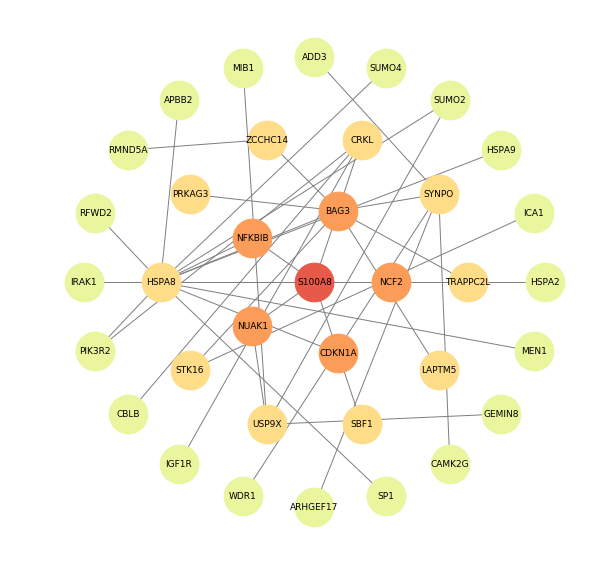

In [384]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
shells = [zero_degree, first_degree, second_degree, third_degree]
cmap = matplotlib.cm.get_cmap('Spectral')
#pos = nx.spring_layout(G, k=0.5)
pos = nx.shell_layout(G, shells, scale=100)
#pos = nx.circular_layout(G)



#nx.draw_networkx(G, pos, node_color="lightblue",with_labels=True, node_size=1000)

nx.draw_networkx_nodes(G,pos,nodelist=zero_degree, with_labels=True, node_size=1500,node_color=cmap(40))

nx.draw_networkx_nodes(G,pos,nodelist=first_degree, node_size=1500,node_color=cmap(70))

nx.draw_networkx_nodes(G,pos,nodelist=second_degree, node_size=1500,node_color=cmap(100))

nx.draw_networkx_nodes(G,pos,nodelist=third_degree, node_size=1500,node_color=cmap(150))

nx.draw_networkx_edges(G,pos, edge_color="gray");

nx.draw_networkx_labels(G,pos,font_size=9);
plt.axis('off')